In [1]:
!pip install librosa

import librosa

audio_file = '/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Matchua/Matchua_030821/bee_30m/REC062_Matchua_tu_12h50_030821_0.wav'
y, sr = librosa.load(audio_file)

n_mfcc = 13
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

mfccs

array([[-2.9567426e+02, -3.2827737e+02, -3.9449921e+02, ...,
        -3.3331488e+02, -3.3533582e+02, -3.3896716e+02],
       [ 1.5103259e+02,  1.6150183e+02,  1.8450458e+02, ...,
         2.0954744e+02,  2.1152551e+02,  1.9911496e+02],
       [-1.7879768e+01, -1.3991020e+00,  1.8883612e+01, ...,
         8.8370943e+00,  1.4761583e+01,  1.7311569e+01],
       ...,
       [ 8.8917418e+00,  4.3454971e+00,  1.1191361e+00, ...,
        -2.1185870e+00, -2.2201860e+00, -5.0585494e+00],
       [ 2.2988756e+00, -2.5240362e+00,  3.1109738e-01, ...,
        -6.6960311e+00, -6.1803627e+00, -4.7117701e+00],
       [ 6.6643772e+00,  4.4179645e+00,  5.5731950e+00, ...,
         3.7189841e-01, -2.5334034e+00,  1.4920851e+00]], dtype=float32)

KeyboardInterrupt: 

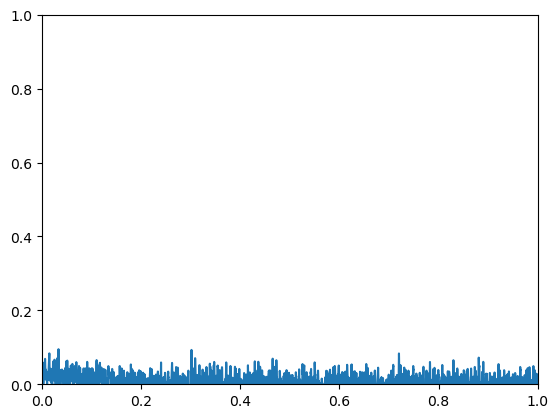

In [2]:
import wave
import matplotlib.pyplot as plt
import numpy as np

with wave.open('/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Matchua/Matchua_030821/bee_30m/REC062_Matchua_tu_12h50_030821_0.wav', 'rb') as wave_file:
    num_channels = wave_file.getnchannels()
    sample_width = wave_file.getsampwidth()
    frame_rate = wave_file.getframerate()
    num_frames = wave_file.getnframes()

    frames = wave_file.readframes(num_frames)

    if sample_width == 1:
        samples = np.frombuffer(frames, dtype='uint8')
        samples = (samples - 128) / 128
    elif sample_width == 2:
        samples = np.frombuffer(frames, dtype='int16')
        samples = samples / 32768.0

    samples = samples.reshape(-1, num_channels)
    time_axis = np.arange(num_frames) / float(frame_rate)
    
    #Spectrum
    audio_array = np.frombuffer(frames, dtype=np.int16)
    fft_data = np.fft.fft(audio_array)
    freq_domain = np.linspace(0.0, 1.0/(2.0*(1/frame_rate)), num_frames//2)
    power_spectrum = (2.0/num_frames) * np.abs(fft_data[:num_frames//2])


    plt.plot(time_axis, samples)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


In [ ]:
import librosa
import matplotlib.pyplot as plt

audio_file = '/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Matchua/Matchua_030821/bee_30m/REC062_Matchua_tu_12h50_030821_0.wav'
y, sr = librosa.load(audio_file)

time = librosa.core.times_like(y)

plt.figure(figsize=(14, 5))
plt.plot(time, y)
plt.axhline(y=0, color='black')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
import librosa
import matplotlib.pyplot as plt

audio_file = "/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Matchua/Matchua_030821/bee_30m/REC062_Matchua_tu_12h50_030821_0.wav"
audio_data, sample_rate = librosa.load(audio_file)

spectrogram = librosa.stft(audio_data)
spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [ ]:
import librosa
import os
import soundfile as sf

dir_audio_files = '/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Cochua/Cochua_170621/bee_30m'

# loop through all audio files in the directory
for filename in os.listdir(dir_audio_files):
    if filename.endswith('.wav'):
        # load the audio file
        audio_file = os.path.join(dir_audio_files, filename)
        audio, sr = librosa.load(audio_file, sr=16000)  

        segment_duration = 2
        segment_samples = int(segment_duration * sr)
        hop_length = int(segment_samples / 2) # overlap of 1 second
        
        output_dir = os.path.splitext(audio_file)[0] + '_cut2s_overlap1s'
        os.makedirs(output_dir, exist_ok=True)

        # loop through each segment and save it as a separate file
        for segment_idx, i in enumerate(range(0, len(audio)-segment_samples+1, hop_length)):
            segment_start = i
            segment_end = i + segment_samples
            segment = audio[segment_start:segment_end]

            output_filename = f'{os.path.splitext(filename)[0]}_{segment_idx + 1}.wav'
            output_path = os.path.join(output_dir, output_filename)

            sf.write(output_path, segment, sr)
print(f'segmentaion success!')


In [ ]:
import librosa
import os
import soundfile as sf

audio_file =  '/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Cochua/1623346102504_co chua_troi mat_co mua_100621.wav'

audio, sr = librosa.load(audio_file, sr=16000)  

segment_duration = 2
segment_samples = int(segment_duration * sr)
hop_length = int(segment_samples / 2) # overlap of 1 second

output_dir = os.path.splitext(audio_file)[0] + '_cut2s_overlap1s'
os.makedirs(output_dir, exist_ok=True)

# loop through each segment and save it as a separate file
for segment_idx, i in enumerate(range(0, len(audio)-segment_samples+1, hop_length)):
    segment_start = i
    segment_end = i + segment_samples
    segment = audio[segment_start:segment_end]

    output_filename = f'{os.path.splitext(filename)[0]}_{segment_idx + 1}.wav'
    output_path = os.path.join(output_dir, output_filename)

    sf.write(output_path, segment, sr)
print(f'segmentaion success!')


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

dir_path = "/Users/quanghuypham/Desktop/20k_audio_splitted_dataset/train/Queen"

new_dir_path = os.path.join('/Users/quanghuypham/Desktop/MFCC 20k bee dataset/train', 'mfccs_Queen')

os.makedirs(new_dir_path, exist_ok=True)

file_names = os.listdir(dir_path)

from PIL import Image

for filename in os.listdir(dir_path):
    if filename.endswith('.wav'):
        audio_file, sr = librosa.load(os.path.join(dir_path, filename), sr=16000)

        mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=40)

        plt.figure()
        plt.imshow(mfccs, cmap='coolwarm', origin='lower', aspect='auto')
        plt.axis('off') 
        plt.tight_layout()

        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(new_dir_path, output_filename)
        plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)

        # Open the saved PNG image
        image = Image.open(output_path)

        # Resize the image
        resized_image = image.resize((496, 369))

        # Save the resized image
        resized_image.save(output_path, format='PNG')
        
        plt.close()

print("Success!")

In [ ]:
import os

dir = '/Users/quanghuypham/Desktop/Queenless Bee sound Kit Records/Cochua/1623346102504_co chua_troi mat_co mua_100621_cut2s_overlap1s/mfccs_images'

count = 0
for filename in os.listdir(dir):
    if filename.endswith('.png'):
        count += 1
        new_filename = f'Cochua_100621_700_{count}.png'
        os.rename(os.path.join(dir, filename), os.path.join(dir, new_filename))


#HHT

import numpy as np
from scipy.io import wavfile
from pyemd import emd

# Load audio file
sample_rate, samples = wavfile.read('/Users/quanghuypham/Downloads/20k_audio_splitted_dataset/val/Queenless/queenless_9991.wav')

# Extract one channel (if stereo)
# samples = samples[:, 0]

# Normalize samples to be between -1 and 1
samples = samples / np.max(np.abs(samples))

# Perform empirical mode decomposition
imfs = emd(samples, max_imf=10)

# Compute the Hilbert spectrum
hs = np.abs(np.apply_along_axis(np.fft.fft, 1, imfs))

# Calculate the mean spectrum
mean_spec = np.mean(hs, axis=0)

# Plot the mean spectrum
import matplotlib.pyplot as plt
freqs = np.fft.fftfreq(mean_spec.size, d=1/sample_rate)
plt.plot(freqs[:len(freqs)//2], mean_spec[:len(mean_spec)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
import os
import librosa
import numpy as np

dir_path = "/Users/quanghuypham/Downloads/20k_audio_splitted_dataset/test/Queen"

new_dir_path = os.path.join('/Users/quanghuypham/Downloads/20k_audio_splitted_dataset/test', 'mfccs_Queen_vectors')

os.makedirs(new_dir_path, exist_ok=True)

for filename in os.listdir(dir_path):
    if filename.endswith('.wav'):
        audio_file, sr = librosa.load(os.path.join(dir_path, filename), sr=16000)
        mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=40)
        mfccs_vector = np.mean(mfccs.T,axis=0)

        output_filename = os.path.splitext(filename)[0] + '.npy'
        output_path = os.path.join(new_dir_path, output_filename)
        np.save(output_path, mfccs_vector)

print("Success!")


In [ ]:

def mfcc_extract(filename, n_mfcc=40):
    y, sr = librosa.load(filename)
    mfcc = librosa.feature.mfcc(y, sr, n_mfcc=n_mfcc)
    mfcc_mean = mfcc.mean(axis=1).T
    mfcc_feature = mfcc_mean
    return mfcc_feature

def stft_extract(filename):
    y, sr = librosa.load(filename)
    stft = librosa.stft(y, n_fft=512, hop_length=None, win_length=None, window='hann', center=True)
    stft_mean = np.mean(np.abs(stft).T,axis=1)
    stft = np.hstack([stft-mean, stft-std])
    return stft

In [16]:
import librosa
import numpy as np
import os

def mfcc_extract(filename, n_mfcc=40):
    y, sr = librosa.load(filename)
    stft = np.abs(librosa.stft(y))
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(stft), n_mfcc=n_mfcc)
    mfcc_mean = mfcc.mean(axis=1).T
    mfcc_feature = mfcc_mean
    return mfcc_feature

# Folder path containing the WAV files
folder_path = '/Users/quanghuypham/Desktop/20k_audio_splitted_dataset/test/Queen'

# Create a folder to save the MFCC files
save_folder = '/Users/quanghuypham/Desktop/MFCC numpy 20k bee dataset/train/Queenless'
os.makedirs(save_folder, exist_ok=True)

# Get a list of all WAV files in the folder
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Process each WAV file and save the corresponding MFCC features
for wav_file in wav_files:
    filename = os.path.join(folder_path, wav_file)
    mfcc_features = mfcc_extract(filename)
    
    # Create a save path for the MFCC features
    save_path = os.path.join(save_folder, os.path.splitext(wav_file)[0] + '_mfcc.npy')
    
    # Save the MFCC features
    np.save(save_path, mfcc_features)
print('DONE')

DONE


In [8]:
import os

# Folder path containing the .npy files
folder_path = '/Users/quanghuypham/Desktop/20k_audio_splitted_dataset/train/Queen'

# Get a list of all .npy files in the folder
npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# Delete each .npy file
for npy_file in npy_files:
    file_path = os.path.join(folder_path, npy_file)
    os.remove(file_path)


In [2]:
import os
import numpy as np
import librosa

def stft_extract(filename):
    y, sr = librosa.load(filename)
    stft = librosa.stft(y, n_fft=512, hop_length=None, win_length=None, window='hann', center=True)
    stft_mean = np.mean(np.abs(stft).T, axis=1)
    stft = np.hstack([stft - stft_mean, stft - stft_mean]) 
    return stft

def extract_stft_features(directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            stft = stft_extract(file_path)

            output_filename = os.path.splitext(filename)[0] + ".npy"
            output_path = os.path.join(output_directory, output_filename)
            np.save(output_path, stft)


WAV_DIR = "/Users/quanghuypham/Desktop/20k_audio_splitted_dataset/train/Queenless"
OUTPUT_DIR = "/Users/quanghuypham/Desktop/STFT LOWER 20k bee/train/Queenless"
os.makedirs(OUTPUT_DIR, exist_ok=True)

extract_stft_features(WAV_DIR, OUTPUT_DIR)
print('DONE')

DONE


In [3]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

def stft_extract(filename):
    y, sr = librosa.load(filename)
    stft = librosa.stft(y, n_fft=512, hop_length=None, win_length=None, window='hann', center=True)
    stft = np.abs(stft)
    stft = librosa.amplitude_to_db(stft, ref=np.max)
    return stft

def save_stft_images(directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            stft = stft_extract(file_path)

            output_filename = os.path.splitext(filename)[0] + ".png"
            output_path = os.path.join(output_directory, output_filename)

            # Plot and save the STFT spectrogram as an image without displaying
            plt.figure(figsize=(10, 6))
            plt.imshow(stft, aspect='auto', origin='lower')
            plt.axis('off')  # Remove axis labels
            plt.colorbar(format='%+2.0f dB')
            plt.tight_layout()  # Remove padding
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()

WAV_DIR = "/Users/quanghuypham/Desktop/20k_audio_splitted_dataset/train/Queenless"
OUTPUT_DIR = "/Users/quanghuypham/Desktop/STFT_2D_20k_bee/train/Queenless"
os.makedirs(OUTPUT_DIR, exist_ok=True)

save_stft_images(WAV_DIR, OUTPUT_DIR)
print('DONE')


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 1000x600 with 0 Axes>

In [4]:
import numpy as np

# Load the numpy file
data = np.load('/Users/quanghuypham/Desktop/STFT 20k bee dataset/test/Queen/queen_1.npy')

# Get the shape of the data
input_shape = data.shape

print("Input shape:", input_shape)


Input shape: (257, 690)
